# 네이버 뉴스 분석

## data load

In [3]:
import pandas as pd

In [4]:
df = pd.read_pickle("애플_news_20210109.pkl")

In [5]:
len(df)

1000

In [9]:
df[['title', 'description']].head(5)

,title,description
0,01-08-2021 모닝뉴스 헤드라인,"<b>애플</b>이 오는 2027년 출시할 예정인 자율주행 전기차, <b>애플</b..."
1,"‘페이팔’ 올해부터 암호화폐 결제, 옐런은 과거 회의적 입장","이후 20대에 <b>애플</b>에 자문위원으로 가세, 인공지능 기술 개발에 참여했다..."
2,현대차·<b>애플</b> 자율주행 전기차 협업 추진,현대차그룹과 <b>애플</b>의 협업 가능성이 제기되면서 자동차 업계가 술렁이고 있...
3,[사설] 코로나 여파에도 삼성전자 우리 경제 버팀목 확인했다,<b>애플</b>과 인텔 등 글로벌 기업보다도 많았다. 삼성전자는 최근 6년 동안 ...
4,"갤럭시S21, 출고가 낮출 예정, 사전예약 일정은?",높은 가격을 고집하던 5G 플래그십 스마트폰 시장에서 갤럭시S21의 낮아진 가격은 ...


In [10]:
df['content'] = df['title'] + df['description']

## pre processing(tokenize word)
- 형태소 분석기 설치
- 형태소 분석기 를 통한 명사 추출


### 형태소 분석기(KoNLPy) 설치 
[KoNLPy 설치](https://konlpy-ko.readthedocs.io/ko/v0.4.4/install/)

In [11]:
!pip3 install JPype1-py3 > /dev/null

In [12]:
!pip3 install konlpy > /dev/null

### 명사 추출

In [13]:
from konlpy.tag import Okt
okt = Okt()

- list type

In [14]:
# dataframe column to list
news_list = df['content'].tolist()

In [15]:
news_token = []
for news in news_list:
    news_token.append( okt.nouns(news))

In [16]:
news_token

[['모닝',
  '뉴스',
  '헤드라인',
  '애플',
  '이',
  '출시',
  '예정',
  '자율',
  '주행',
  '전기차',
  '애플',
  '카를',
  '자동차',
  '공동',
  '개발',
  '전기차',
  '생산',
  '배터리',
  '기술',
  '공유',
  '것',
  '확인',
  '레이커스',
  '홈',
  '샌앤토니오',
  '스퍼스'],
 ['페이팔',
  '올해',
  '암호',
  '화폐',
  '결제',
  '옐런',
  '과거',
  '회의',
  '입장',
  '이후',
  '애플',
  '자문',
  '위원',
  '가세',
  '인공',
  '지능',
  '기술',
  '개발',
  '참여',
  '애플',
  '시절',
  '그',
  '일',
  '시간',
  '급여',
  '암호',
  '화폐',
  '비트코인',
  '하나',
  '로',
  '주위',
  '수년',
  '지난',
  '지금',
  '의',
  '국제',
  '시세'],
 ['현대차',
  '애플',
  '자율',
  '주행',
  '전기차',
  '협업',
  '추진',
  '현대차',
  '그룹',
  '애플',
  '의',
  '협업',
  '가능성',
  '제기',
  '자동차',
  '업계',
  '현대차',
  '애플',
  '이',
  '손',
  '단숨',
  '전기차',
  '시장',
  '포식자',
  '것',
  '기대',
  '우려',
  '때문',
  '날',
  '국내',
  '매체',
  '현대차'],
 ['사설',
  '코로나',
  '여파',
  '삼성',
  '전자',
  '우리',
  '경제',
  '버팀목',
  '확인',
  '애플',
  '과',
  '인텔',
  '등',
  '글로벌',
  '기업',
  '전자',
  '최근',
  '동안',
  '투자',
  '액',
  '글로벌',
  '순위',
  '위',
  '차지',
  '올해',
  '차세대',
  '기술',
  '사업',


- dataframe apply

In [17]:
 df['tokenize'] = df['content'].apply(okt.nouns) 

In [18]:
 df[['content', 'tokenize']]

,content,tokenize
0,01-08-2021 모닝뉴스 헤드라인<b>애플</b>이 오는 2027년 출시할 예정...,"[모닝, 뉴스, 헤드라인, 애플, 이, 출시, 예정, 자율, 주행, 전기차, 애플,..."
1,"‘페이팔’ 올해부터 암호화폐 결제, 옐런은 과거 회의적 입장이후 20대에 <b>애플...","[페이팔, 올해, 암호, 화폐, 결제, 옐런, 과거, 회의, 입장, 이후, 애플, ..."
2,현대차·<b>애플</b> 자율주행 전기차 협업 추진현대차그룹과 <b>애플</b>의 ...,"[현대차, 애플, 자율, 주행, 전기차, 협업, 추진, 현대차, 그룹, 애플, 의,..."
3,[사설] 코로나 여파에도 삼성전자 우리 경제 버팀목 확인했다<b>애플</b>과 인텔...,"[사설, 코로나, 여파, 삼성, 전자, 우리, 경제, 버팀목, 확인, 애플, 과, ..."
4,"갤럭시S21, 출고가 낮출 예정, 사전예약 일정은?높은 가격을 고집하던 5G 플래그...","[갤럭시, 출고, 예정, 사전예약, 일정, 가격, 고집, 플래그, 스마트폰, 시장,..."
...,...,...
995,<b>애플</b>-현대차 '맞손' 기대에 시장 술렁…&quot;초기에 불과&quot...,"[애플, 현대차, 손, 기대, 시장, 술렁, 초기, 불과, 애플, 이, 자율, 주행..."
996,"데스티니 차일드: 디펜스 워, 홍보모델 김세정 발탁데스티니 차일드: 디펜스 워는 지...","[데스티니, 차, 일드, 디펜스, 워, 홍보, 모델, 김세정, 발탁, 데스티니, 차..."
997,<b>애플</b>發 자율차 희소식에…현대차·모비스 20%대 급등현대차-<b>애플</...,"[애플, 자율, 차, 희소식, 현대차, 모비스, 급등, 현대차, 애플, 자율, 차,..."
998,엔씨소프트 리니지2M 대만∙일본 사전 예약 시작사전 예약은 각 국가의 리니지2M 공...,"[엔씨소프트, 리니지, 대만, 일본, 사전, 예약, 시작, 사전, 예약, 각, 국가..."


## word2vec model 만들기

In [19]:
from gensim.models import Word2Vec

In [20]:
model = Word2Vec( df['tokenize'])

In [21]:
print(model)

Word2Vec(vocab=1045, size=100, alpha=0.025)


In [22]:
model.wv.index2word

['애플',
 '현대차',
 '협력',
 '전기차',
 '카',
 '이',
 '그룹',
 '아이폰',
 '자율',
 '등',
 '주가',
 '급등',
 '자동차',
 '주행',
 '의',
 '것',
 '소식',
 '출시',
 '개발',
 '코스피',
 '전자',
 '과',
 '진행',
 '설',
 '협의',
 '시장',
 '제안',
 '생산',
 '원',
 '사업',
 '관련',
 '지난해',
 '주식',
 '날',
 '시리즈',
 '글로벌',
 '중이',
 '폭등',
 '삼성',
 '대만',
 '위해',
 '현대',
 '논의',
 '정의선',
 '회장',
 '위',
 '돌파',
 '업계',
 '상승',
 '대감',
 '지원',
 '수출',
 '오늘',
 '코로나',
 '초기',
 '모비스',
 '한국',
 '구글',
 '리니지',
 '마감',
 '장',
 '미래',
 '테슬라',
 '가치',
 '가격',
 '스마트폰',
 '협업',
 '차',
 '기업',
 '뉴스',
 '투자',
 '전날',
 '단계',
 '결정',
 '기술',
 '반도체',
 '세계',
 '미국',
 '사상',
 '수',
 '최대',
 '전',
 '아마존',
 '명',
 '주',
 '최고',
 '은',
 '예약',
 '공식',
 '로',
 '후',
 '그',
 '기록',
 '네이버',
 '카카오',
 '외국인',
 '시가총액',
 '부품',
 '거래',
 '증권',
 '점',
 '힘',
 '속',
 '대해',
 '접속',
 '목표',
 '갤럭시',
 '손',
 '모델',
 '말',
 '작년',
 '액',
 '현재',
 '를',
 '도',
 '플레이',
 '앱스토어',
 '공동',
 '중',
 '또',
 '크게',
 '로이터',
 '개',
 '증가',
 '발표',
 '기자',
 '페이스북',
 '제',
 '질주',
 '검토',
 '모빌리티',
 '실적',
 '성사',
 '종목',
 '바',
 '보도',
 '대비',
 '각',
 '영향',
 '일본',
 '대한',
 '언론',
 '통해',
 '

### model save

In [23]:
model.save('애플.w2v')

## word2vec model 테스트

### model load

In [24]:
model_apple = Word2Vec.load('애플.w2v')

In [25]:
print(model_apple)

Word2Vec(vocab=1045, size=100, alpha=0.025)


In [26]:
model_apple.wv.most_similar('아이폰')

[('시리즈', 0.9998201131820679),
 ('판매량', 0.999577522277832),
 ('이후', 0.9995577335357666),
 ('첫', 0.9995366930961609),
 ('흥행', 0.9995142221450806),
 ('모델', 0.9994672536849976),
 ('하반기', 0.9994120597839355),
 ('스마트폰', 0.9993581771850586),
 ('미니', 0.9991501569747925),
 ('예정', 0.9990923404693604)]

In [27]:
model_apple.wv.most_similar('충전기')

[('처럼', 0.9995977878570557),
 ('등', 0.9995710849761963),
 ('기본', 0.9995705485343933),
 ('말', 0.9995604157447815),
 ('중', 0.9995546936988831),
 ('판매', 0.9995541572570801),
 ('혁신', 0.9995334148406982),
 ('영상', 0.9995276927947998),
 ('예고', 0.9995189309120178),
 ('바이든', 0.9995184540748596)]

## word cloud

### wordcloud install

In [28]:
!pip3 install wordcloud > /dev/null

In [29]:
from  wordcloud import WordCloud

### 단어 추출

In [30]:
token_word_list = list()
for i in df['tokenize'].tolist():
    for j in i:
        token_word_list.append(j)

In [31]:
token_word = ' '.join(token_word_list)

In [32]:
token_word

'모닝 뉴스 헤드라인 애플 이 출시 예정 자율 주행 전기차 애플 카를 자동차 공동 개발 전기차 생산 배터리 기술 공유 것 확인 레이커스 홈 샌앤토니오 스퍼스 페이팔 올해 암호 화폐 결제 옐런 과거 회의 입장 이후 애플 자문 위원 가세 인공 지능 기술 개발 참여 애플 시절 그 일 시간 급여 암호 화폐 비트코인 하나 로 주위 수년 지난 지금 의 국제 시세 현대차 애플 자율 주행 전기차 협업 추진 현대차 그룹 애플 의 협업 가능성 제기 자동차 업계 현대차 애플 이 손 단숨 전기차 시장 포식자 것 기대 우려 때문 날 국내 매체 현대차 사설 코로나 여파 삼성 전자 우리 경제 버팀목 확인 애플 과 인텔 등 글로벌 기업 전자 최근 동안 투자 액 글로벌 순위 위 차지 올해 차세대 기술 사업 대한 투자 박차 이재용 삼성 전자 부회장 갤럭시 출고 예정 사전예약 일정 가격 고집 플래그 스마트폰 시장 갤럭시 의 가격 애플 의 아이폰 를 견제 함 동시 코로나 로 스마트폰 시장 침체 상황 소비자 가격 부담 판매량 휴대폰 정보 카페 주목 아이폰 갤럭시 가격 하향 핸드폰 법 애플 의 아이폰 시리즈 최초 지원이 아이폰 중 저가 선호 소비자 자료 아이폰 미니 모델 가격 애플 이 출시 모델 아이폰 기록 폰 아이폰 미니 공시 아이폰 가격 공짜 폰 재고 정리 애플 의 작년 하반기 전략 스마트폰 아이폰 시리즈 출시 후 지금 연일 완판 행보 보이 애플 의 아이폰 시리즈 중 현재 진행 판매 결과 블루 및 퍼시픽 블루 나머지 색상 갤럭시 출시일 스펙 연일 이슈 아이폰 미니 가격 할인 최고 애플 이 아이폰 시리즈 통해 뒤 추격 만큼 갤럭시 시리즈 흥행 애플 은 아이폰 시리즈 흥행 통해 지난해 스마트폰 하량 년 대비 역대 최 마야 폰 갤럭시 노트 노트 울트라 재고 정리 가격 특 혜택 코로나 로 스마트폰 시장 침체 상황 소비자 가격 부담 판매량 높이 애플 한편 삼성 전자 갤럭시 시리즈 경쟁 애플 의 아이폰 시리즈 출시 이후 현재 판매량 코스피 지수 역대 두번째 폭 상승 선도 자동차 그룹 애플 전기차 협력 설 

### 한글폰트 설치

In [33]:
!apt-get install fonts-nanum* -qq > /dev/null

In [34]:
wordcloud_apple = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', width=800, height=600 ).generate(token_word)

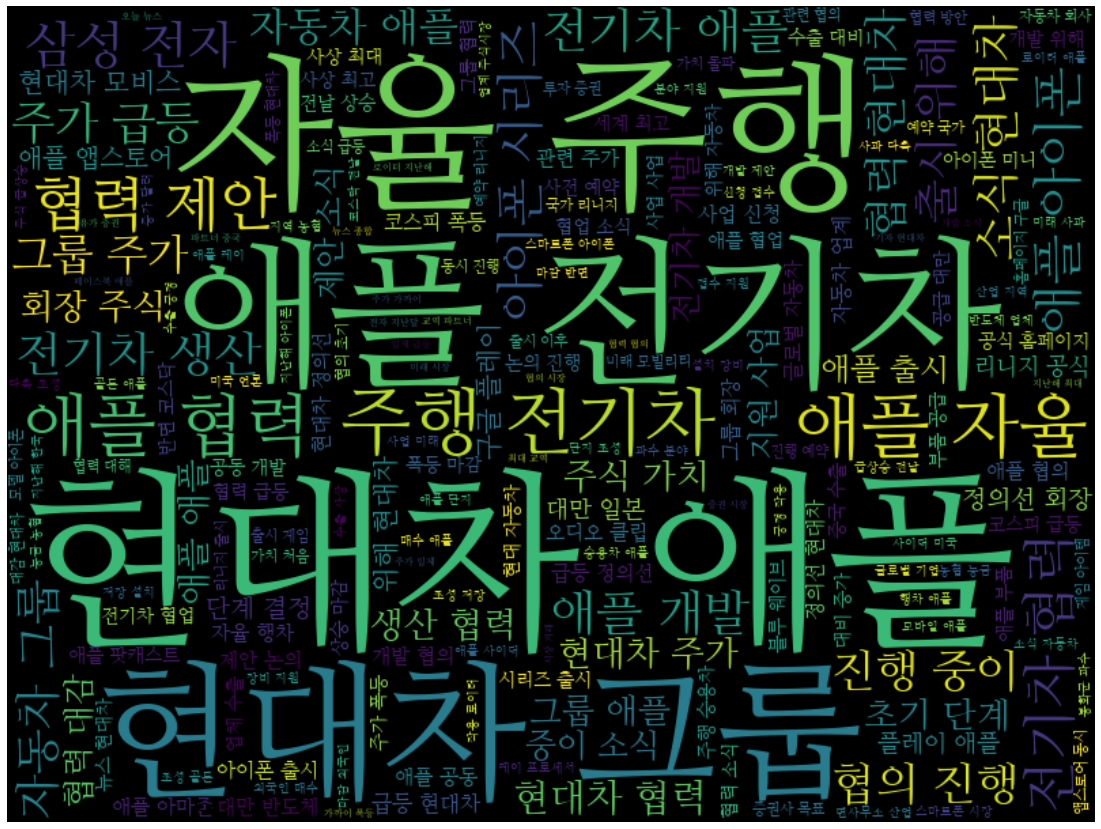

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
plt.imshow(wordcloud_apple, interpolation='bilinear')
plt.axis('off')
plt.show()

# 실습

## 3교시에 생성한 삼성 뉴스를 load하여 
- word2vec 모델을 생성하고, 
- wordcloud를 생성합니다